In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

In [50]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Location                 1000 non-null   object 
 4   Subscription_Start_Date  1000 non-null   object 
 5   Subscription_Type        1000 non-null   object 
 6   Monthly_Payment          1000 non-null   float64
 7   Payment_Method           1000 non-null   object 
 8   Monthly_Hours_Watched    1000 non-null   float64
 9   Favorite_Genre           1000 non-null   object 
 10  Devices_Used             1000 non-null   object 
 11  Average_Session_Length   1000 non-null   float64
 12  Content_ID               1000 non-null   int64  
 13  Rating_Given             1000 non-null   int64  
 14  Churned                  

In [52]:
#Cleaning Data 1: Check if there is duplicated data or miss data (except churned)

In [53]:
df.isna().any()

User_ID                    False
Age                        False
Gender                     False
Location                   False
Subscription_Start_Date    False
Subscription_Type          False
Monthly_Payment            False
Payment_Method             False
Monthly_Hours_Watched      False
Favorite_Genre             False
Devices_Used               False
Average_Session_Length     False
Content_ID                 False
Rating_Given               False
Churned                    False
Date_of_Churn               True
Reason_for_Churn            True
dtype: bool

In [54]:
df.duplicated().any()

False

In [55]:
#Cleaning Data 2: Check if there is abnormal/empty cell that may cause erro

In [56]:
df['Churned'].describe()

count    1000.000000
mean        0.246000
std         0.430894
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Churned, dtype: float64

In [57]:
df['Churned'].astype(object).describe()

count     1000
unique       2
top          0
freq       754
Name: Churned, dtype: int64

In [58]:
churned =df[df['Churned']!=0]
df['Churned'][churned.index].astype(object).describe()

count     246
unique      1
top         1
freq      246
Name: Churned, dtype: int64

In [59]:
#Cleaning Data 3: Check if any invalid data for rating

In [60]:
df['Rating_Given'].astype(object).describe()


count     1000
unique       5
top          2
freq       212
Name: Rating_Given, dtype: int64

In [61]:
print(df[df['Rating_Given']>5].empty)
print(df[df['Rating_Given']<1].empty)

True
True


In [62]:
# Cleaning Data 4: Convert Subscription_Start_Date from string to date, Check if all date are valid

In [110]:
import datetime as dt
today = dt.date.today()
subdate = pd.to_datetime(df['Subscription_Start_Date']).dt.date
df[subdate > today].empty

True

In [64]:
df['Subscription_Start_Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Subscription_Start_Date
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [65]:
df['Monthly_Payment'].astype(object).describe()

count     1000.00
unique       3.00
top         14.99
freq       530.00
Name: Monthly_Payment, dtype: float64

In [66]:
df['Payment_Method'].describe()

count            1000
unique              3
top       Credit Card
freq              613
Name: Payment_Method, dtype: object

In [67]:
df['Subscription_Type'].describe()

count         1000
unique           3
top       Standard
freq           530
Name: Subscription_Type, dtype: object

In [68]:
df['Favorite_Genre'].describe()

count      1000
unique        5
top       Drama
freq        212
Name: Favorite_Genre, dtype: object

In [69]:
# Seperate Churned and Unchurned users in 2 new Dataframs for observation

In [70]:
#Datafram for churned user
df_churned = churned.copy()
df_churned['Date_of_Churn'] = pd.to_datetime(df['Date_of_Churn']).dt.date

In [71]:
df_churned.shape

(246, 17)

In [72]:
#Datafram for stayed user
df_stay = df[df['Churned']==0].drop(columns=['Churned','Date_of_Churn','Reason_for_Churn'])
df_stay.info()
df_stay.head()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  754 non-null    int64  
 1   Age                      754 non-null    int64  
 2   Gender                   754 non-null    object 
 3   Location                 754 non-null    object 
 4   Subscription_Start_Date  754 non-null    object 
 5   Subscription_Type        754 non-null    object 
 6   Monthly_Payment          754 non-null    float64
 7   Payment_Method           754 non-null    object 
 8   Monthly_Hours_Watched    754 non-null    float64
 9   Favorite_Genre           754 non-null    object 
 10  Devices_Used             754 non-null    object 
 11  Average_Session_Length   754 non-null    float64
 12  Content_ID               754 non-null    int64  
 13  Rating_Given             754 non-null    int64  
dtypes: float64(3), int64(4), object

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given
0,1,56,Other,Central,2020-06-07,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5
1,2,69,Other,West,2024-02-21,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1
2,3,46,Female,North,2022-10-06,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2
3,4,32,Female,East,2022-01-04,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1
4,5,60,Female,North,2020-03-13,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4


In [73]:
#Analyse the Age distribution

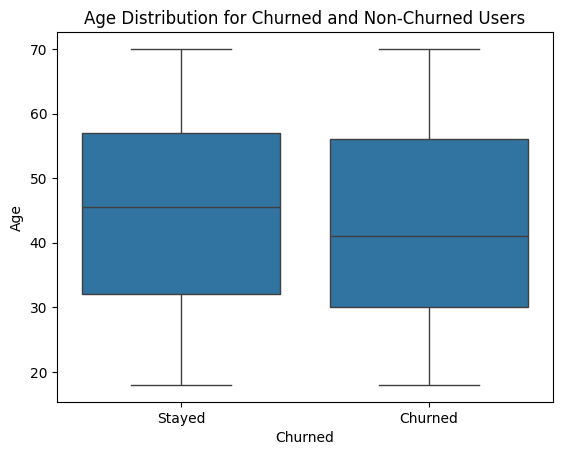

In [100]:
sns.boxplot(x='Churned', y='Age', data=df)
plt.title('Age Distribution for Churned and Non-Churned Users')
plt.xlabel('Churned')
plt.ylabel('Age')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()

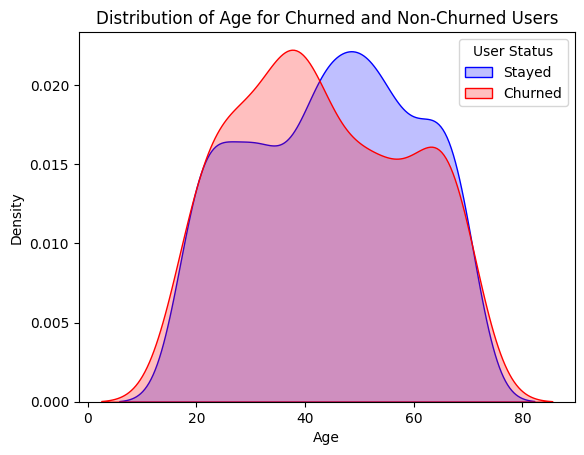

In [75]:
sns.kdeplot(data=df[df['Churned'] == 0], x='Age', label='Stayed',fill = 'True',color='blue')
sns.kdeplot(data=df[df['Churned'] == 1], x='Age', label='Churned',fill = 'True',color='red')
plt.title('Distribution of Age for Churned and Non-Churned Users')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='User Status')
plt.show()

In [77]:
# Analyse the Gender Distribution

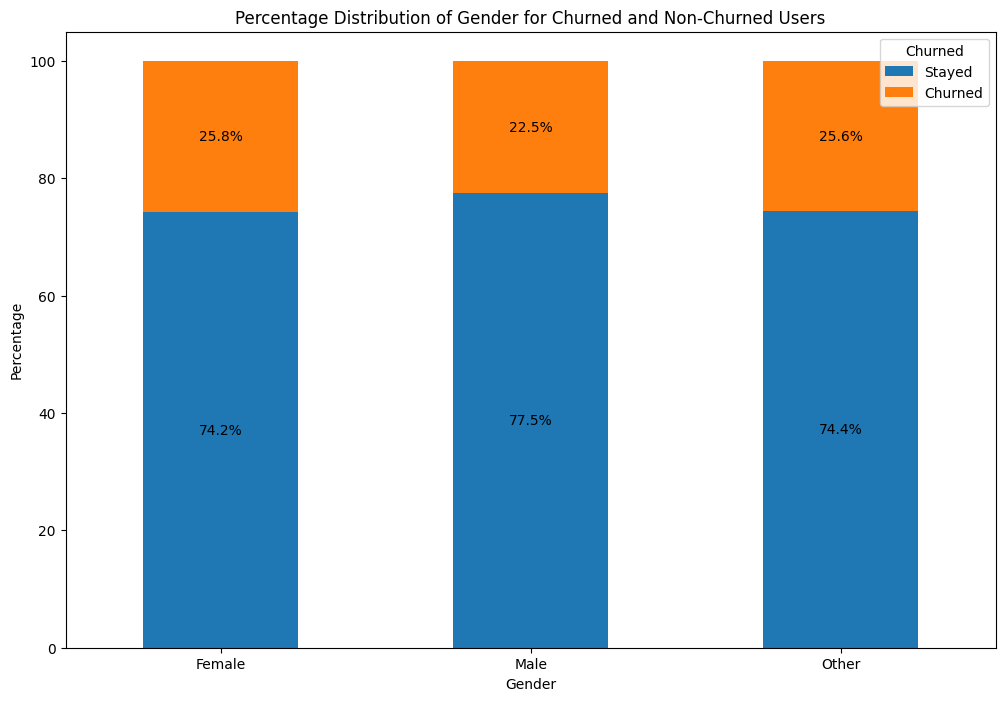

In [101]:
gender_churn = df.groupby(['Gender', 'Churned']).size().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(12, 8))
gender_churn_percentage = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100
gender_churn_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage Distribution of Gender for Churned and Non-Churned Users')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.legend(title='Churned', labels=['Stayed', 'Churned'])
plt.xticks(rotation=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.show()

Text(0.5, 1.0, 'Gender Distribution for all Users ')

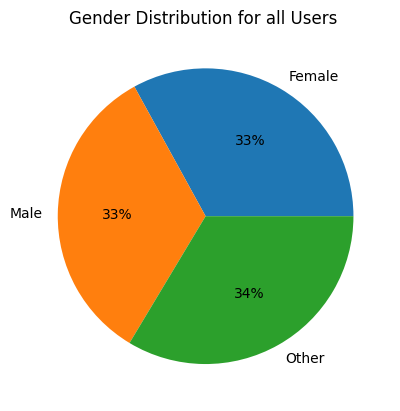

In [102]:
df.groupby('Gender').size().plot.pie(autopct='%1.0f%%')
plt.title('Gender Distribution for all Users ')

In [81]:
#Analyse Rating Given

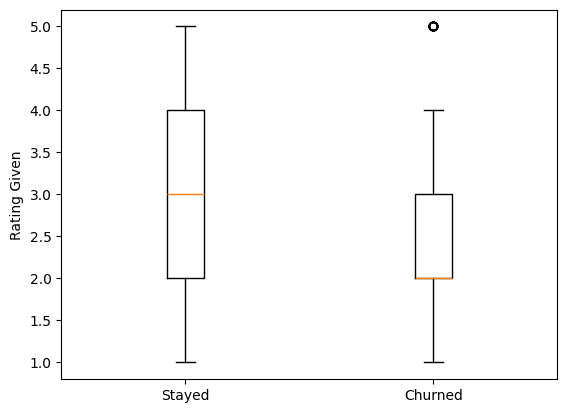

<Figure size 640x480 with 0 Axes>

In [82]:
ax = plt.subplot()
ax.boxplot([df_stay['Rating_Given'],
           df_churned['Rating_Given']])
ax.set_xticklabels(["Stayed","Churned"])
ax.set_ylabel("Rating Given")
plt.show()
plt.clf()

In [83]:
#Analyse Average session length 

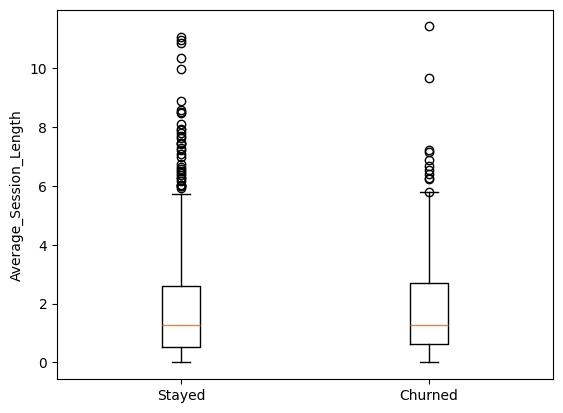

<Figure size 640x480 with 0 Axes>

In [84]:
ax = plt.subplot()
ax.boxplot([df_stay['Average_Session_Length'],
           df_churned['Average_Session_Length']])
ax.set_xticklabels(["Stayed","Churned"])
ax.set_ylabel("Average_Session_Length")
plt.show()
plt.clf()

<Axes: xlabel='Churned', ylabel='Average_Session_Length'>

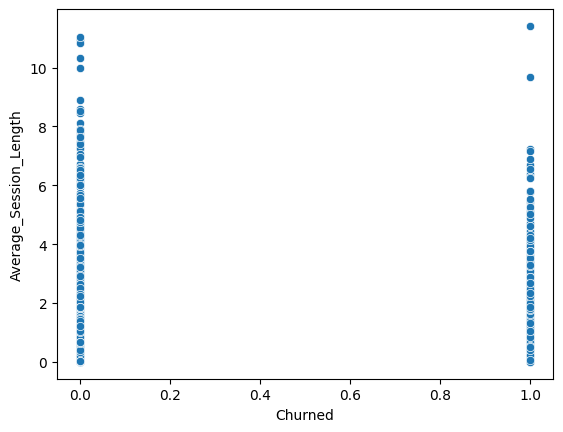

In [85]:
sns.scatterplot(x='Churned', y='Average_Session_Length', data=df)

In [86]:
# Analyse Monthly Payment

Text(0.5, 1.0, 'Monthly Pay')

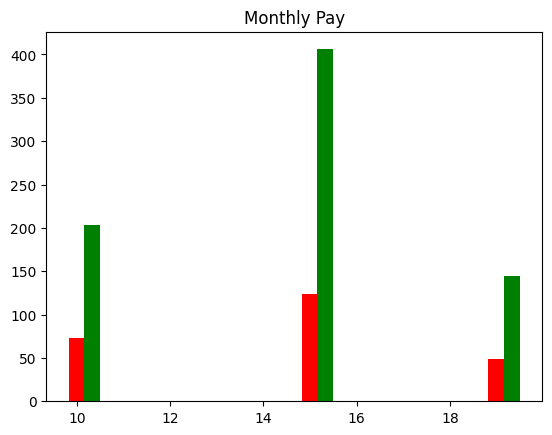

In [87]:
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df_churned['Monthly_Payment'])
b_heights, b_bins = np.histogram(df_stay['Monthly_Payment'], bins=a_bins)
width = (a_bins[1] - a_bins[0])/3
ax.bar(a_bins[:-1], a_heights, width=width, color={"red":"Churned"})
ax.bar(b_bins[:-1]+width, b_heights, width=width, color={"green":"Stayed"})
plt.title('Monthly Pay')


In [ ]:
#Analyse the Subscription Type

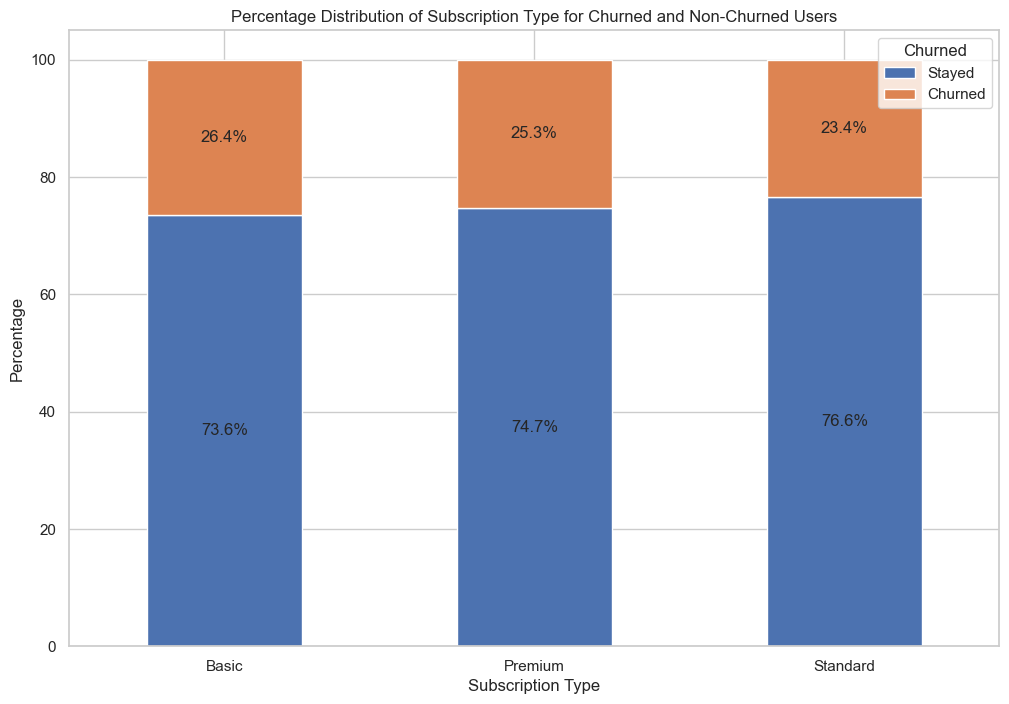

In [143]:
subscription_churn = df.groupby(['Subscription_Type', 'Churned']).size().unstack().fillna(0)
subscription_churn_percentage = subscription_churn.div(subscription_churn.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
subscription_churn_percentage.plot(kind='bar', stacked=True, ax=ax)

# Add titles and labels
ax.set_title('Percentage Distribution of Subscription Type for Churned and Non-Churned Users')
ax.set_xlabel('Subscription Type')
ax.set_ylabel('Percentage')
ax.legend(title='Churned', labels=['Stayed', 'Churned'])
plt.xticks(rotation=0)

# Annotate each segment with the exact percentage value
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.show()

In [88]:
# Analyse Favorite Genre 

Text(0.5, 1.0, 'Churned Costumer Favorite Genre')

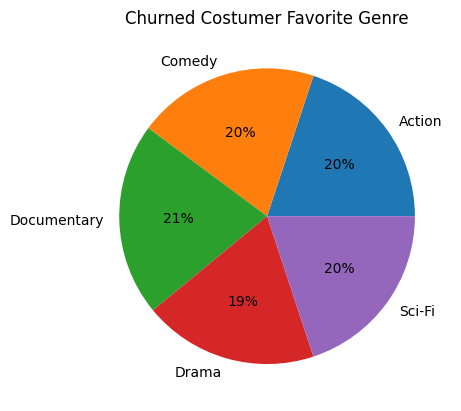

In [90]:
df_churned.groupby('Favorite_Genre').size().plot.pie(autopct='%1.0f%%')
plt.title('Churned Costumer Favorite Genre')

Text(0.5, 1.0, 'Stayed Costumer Favorite Genre')

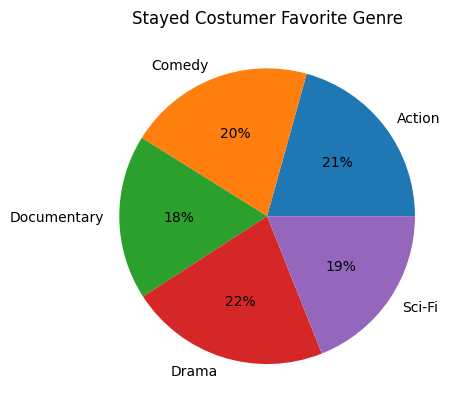

In [92]:
df_stay.groupby('Favorite_Genre').size().plot.pie(autopct='%1.0f%%')
plt.title('Stayed Costumer Favorite Genre')

In [93]:
#Analyse the Reason for Churn

Text(0.5, 1.0, 'Percentage distribution of Reason for Churn')

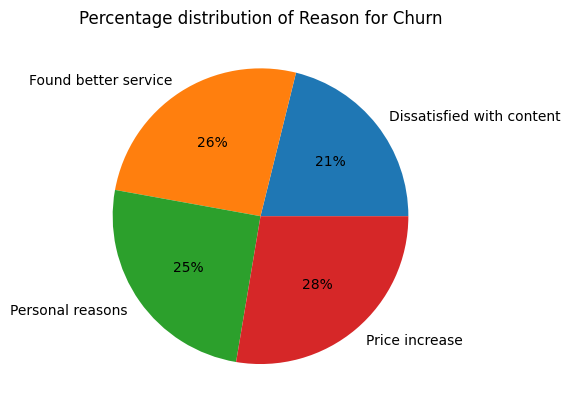

In [94]:
df_churned.groupby('Reason_for_Churn').size().plot.pie(autopct='%1.0f%%')
plt.title('Percentage distribution of Reason for Churn')

In [95]:
#Analyse the Device used

Text(0.5, 1.0, 'Percentage Devices_Used total')

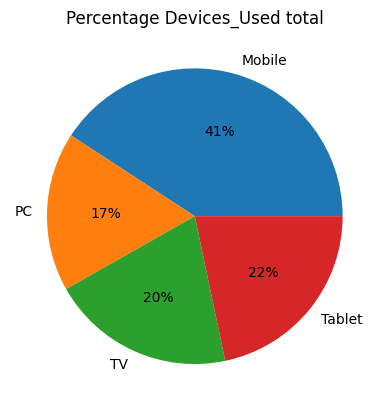

In [98]:
df.groupby('Devices_Used').size().plot.pie(autopct='%1.0f%%')
plt.title('Percentage Devices_Used total')

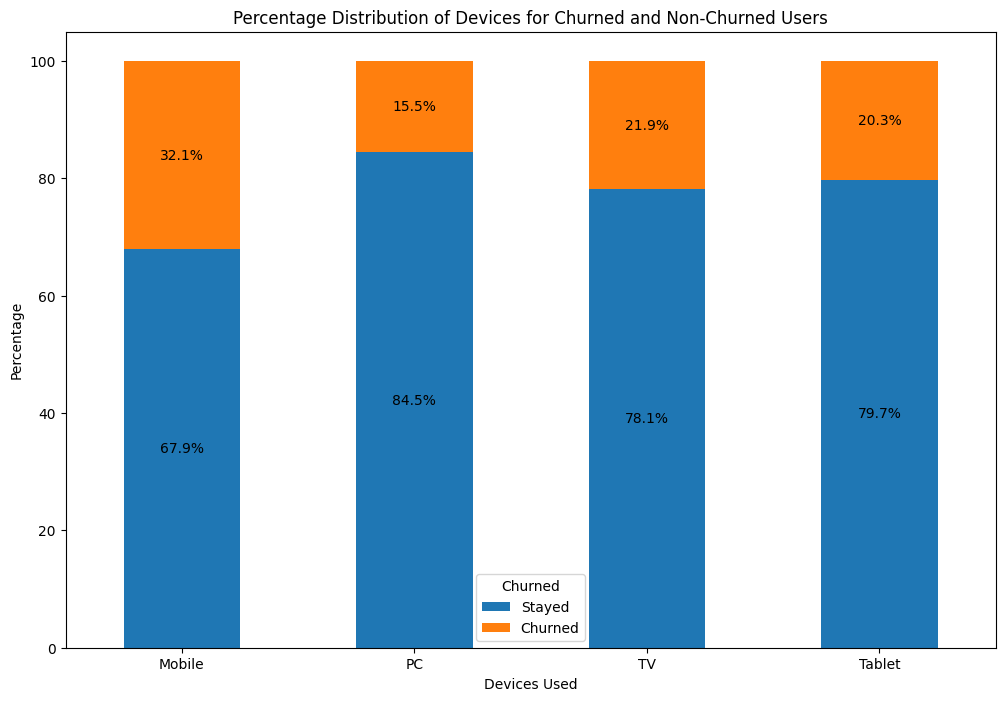

In [107]:
device_churn = df.groupby(['Devices_Used', 'Churned']).size().unstack().fillna(0)
device_churn_percentage = device_churn.div(device_churn.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 8))
device_churn_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Percentage Distribution of Devices for Churned and Non-Churned Users')
ax.set_xlabel('Devices Used')
ax.set_ylabel('Percentage')
ax.legend(title='Churned', labels=['Stayed', 'Churned'])
plt.xticks(rotation=0)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.show()

<Axes: xlabel='Duration_before_Churn', ylabel='Count'>

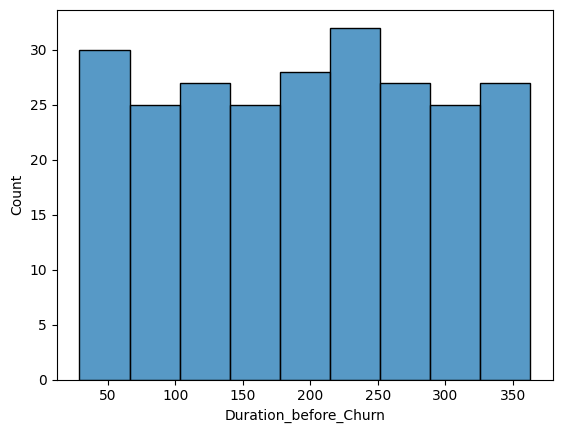

In [115]:
# Convert date columns to datetime format
df_churned['Subscription_Start_Date'] = pd.to_datetime(df_churned['Subscription_Start_Date'])
df_churned['Date_of_Churn'] = pd.to_datetime(df_churned['Date_of_Churn'])

# Calculate the duration in days for users who churned
df_churned['Duration_before_Churn'] = (df_churned['Date_of_Churn'] - df_churned['Subscription_Start_Date']).dt.days
sns.histplot(df_churned['Duration_before_Churn'])

In [137]:
churned_duration_stats = df[df['Churned'] == 1]['Duration_before_Churn'].describe()
print(churned_duration_stats)

count    246.000000
mean     195.357724
std       95.483742
min       30.000000
25%      115.000000
50%      201.000000
75%      276.750000
max      364.000000
Name: Duration_before_Churn, dtype: float64


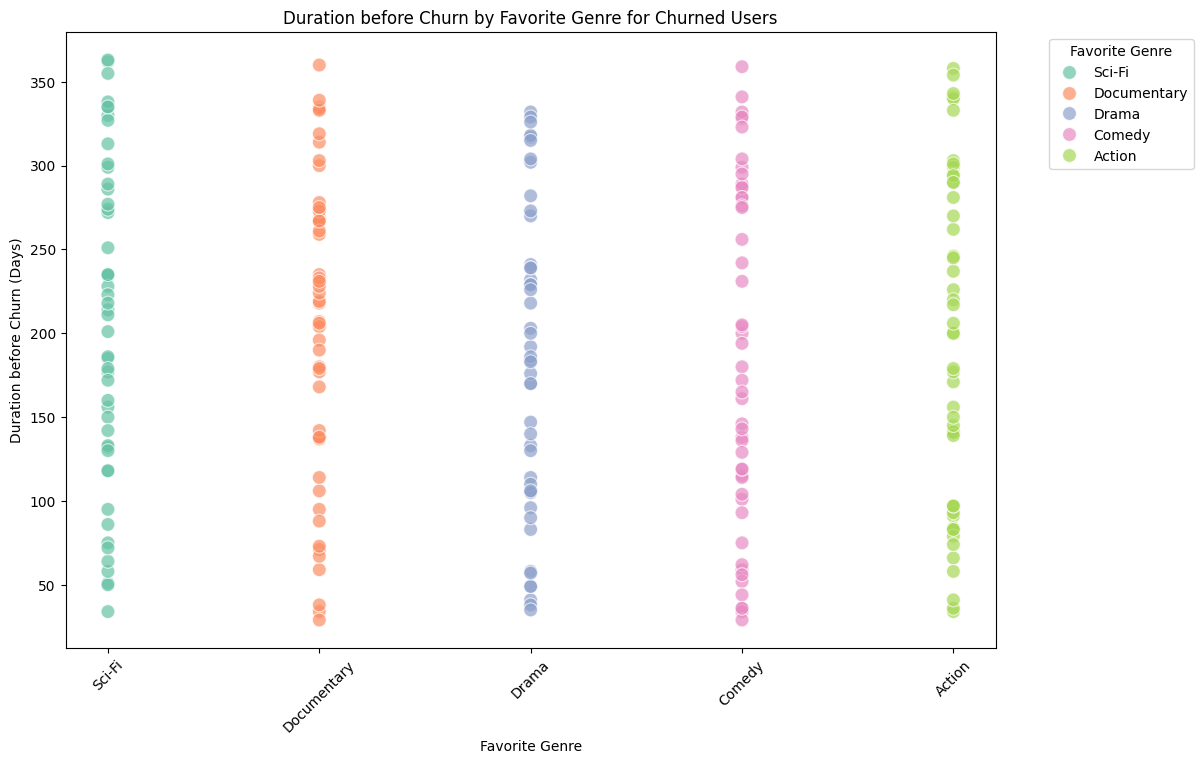

In [134]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Favorite_Genre', y='Duration_before_Churn', data=df_churned, hue='Favorite_Genre', palette='Set2', s=100, alpha=0.7, edgecolor='w')

# 添加标题和标签
plt.title('Duration before Churn by Favorite Genre for Churned Users')
plt.xlabel('Favorite Genre')
plt.ylabel('Duration before Churn (Days)')
plt.legend(title='Favorite Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
